In [481]:
# Importação de bibliotecas necessárias para o funcionamento da aplicação
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Abertura do arquivo e pré-processamento

In [482]:
df = pd.read_csv('/content/drive/MyDrive/2024/Módulos/Pastas pessoais/2024 - Módulo 3/Semana 9/Ponderada de programação /Data/proximo-hit-spotify/train.csv')
df.head()

track_unique_id                track_id            artists  \
0            41996  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1            76471  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2            54809  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3            16326  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           109799  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0     False         0.305  0.8490    9  ...     1       0.0549      0.000058   
1     False         0.287  0.1900    7  ...     0       0.0370      0.930000   
2     False         0.583  0.5090    1  ...     1       0.0362      0.777000   
3     False         0.163  0.0368    8  ...     1       0.0472      0.991000   
4     False         0.647  0.9210    2  ...     1       0.1850      0.000939   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.056700    0.4640   0.3200  141.793               4         goth   
1          0.000356    0.0834   0.1330   83.685               4        opera   
2          0.202000    0.1150   0.5440   90.459               3          idm   
3          0.899000    0.1070   0.0387   69.442               3    classical   
4          0.371000    0.1310   0.1710  137.981               4       techno   

  popularity_target  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  

[5 rows x 21 columns]

In [483]:
# Info do dataframe para averiguar a presença de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

Nenhum valor nulo foi encontrado

In [484]:
# elimina colunas consideradas pouco relevantes
df = df.drop(columns=['track_id', 'track_name', 'artists'])
df.head()

track_unique_id            album_name  duration_ms  explicit  danceability  \
0            41996      Love and Rockets       211533     False         0.305   
1            76471      Filippa Giordano       196000     False         0.287   
2            54809                Symbol       216506     False         0.583   
3            16326  Relajación y siestas       218346     False         0.163   
4           109799       Scooter Forever       173160     False         0.647   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0  0.8490    9   -10.795     1       0.0549      0.000058          0.056700   
1  0.1900    7   -12.030     0       0.0370      0.930000          0.000356   
2  0.5090    1    -9.661     1       0.0362      0.777000          0.202000   
3  0.0368    8   -23.149     1       0.0472      0.991000          0.899000   
4  0.9210    2    -7.294     1       0.1850      0.000939          0.371000   

   liveness  valence    tempo  time_signature track_genre  popularity_target  
0    0.4640   0.3200  141.793               4        goth                  0  
1    0.0834   0.1330   83.685               4       opera                  0  
2    0.1150   0.5440   90.459               3         idm                  1  
3    0.1070   0.0387   69.442               3   classical                  0  
4    0.1310   0.1710  137.981               4      techno                  0

In [485]:
full = df
full['track_genre'].unique()

array(['goth', 'opera', 'idm', 'classical', 'techno', 'pop', 'acoustic',
       'study', 'trance', 'progressive-house', 'dance', 'forro', 'mpb',
       'emo', 'kids', 'dubstep', 'dancehall', 'rockabilly', 'children',
       'cantopop', 'indie-pop', 'rock-n-roll', 'punk', 'black-metal',
       'pop-film', 'club', 'heavy-metal', 'hardcore', 'swedish', 'chill',
       'r-n-b', 'power-pop', 'trip-hop', 'piano', 'hip-hop', 'funk',
       'rock', 'hardstyle', 'j-dance', 'country', 'german', 'garage',
       'malay', 'deep-house', 'folk', 'death-metal', 'disney',
       'hard-rock', 'disco', 'indian', 'pagode', 'brazil',
       'minimal-techno', 'punk-rock', 'bluegrass', 'indie', 'spanish',
       'gospel', 'sleep', 'new-age', 'sertanejo', 'psych-rock', 'j-rock',
       'reggaeton', 'guitar', 'alternative', 'breakbeat', 'latino',
       'synth-pop', 'electronic', 'sad', 'alt-rock', 'songwriter',
       'party', 'reggae', 'detroit-techno', 'salsa', 'dub', 'british',
       'samba', 'blues', 'h

In [486]:
enc = preprocessing.OrdinalEncoder()
original_columns = df.columns
encoded = enc.fit_transform(df)
df = pd.DataFrame(encoded, columns=original_columns)
df.head()

track_unique_id  album_name  duration_ms  explicit  danceability  energy  \
0          29322.0     18054.0      19225.0       0.0         440.0  1780.0   
1          53337.0     10815.0      15816.0       0.0         422.0  1121.0   
2          38200.0     28726.0      20291.0       0.0         718.0  1440.0   
3          11442.0     24834.0      20649.0       0.0         298.0   491.0   
4          76782.0     26251.0      10868.0       0.0         782.0  1852.0   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0  9.0    8251.0   1.0        328.0         987.0            3957.0    1172.0   
1  7.0    7105.0   0.0        149.0        4789.0            2017.0     642.0   
2  1.0    9346.0   1.0        141.0        4636.0            4453.0     823.0   
3  8.0    1502.0   1.0        251.0        4850.0            5150.0     815.0   
4  2.0   11697.0   1.0        864.0        2116.0            4622.0     839.0   

   valence    tempo  time_signature  track_genre  popularity_target  
0   1064.0  26881.0             3.0         41.0                0.0  
1    877.0   4766.0             3.0         76.0                0.0  
2   1288.0   7018.0             2.0         54.0                1.0  
3    239.0   1000.0             2.0         16.0                0.0  
4    915.0  25548.0             3.0        109.0                0.0

In [487]:
# remove os ids para que eles não afetem no modelo (serão reinseridos posteriormente)
ids = df['track_unique_id']
df = df.drop(columns=['track_unique_id'])
df.head()

album_name  duration_ms  explicit  danceability  energy  key  loudness  \
0     18054.0      19225.0       0.0         440.0  1780.0  9.0    8251.0   
1     10815.0      15816.0       0.0         422.0  1121.0  7.0    7105.0   
2     28726.0      20291.0       0.0         718.0  1440.0  1.0    9346.0   
3     24834.0      20649.0       0.0         298.0   491.0  8.0    1502.0   
4     26251.0      10868.0       0.0         782.0  1852.0  2.0   11697.0   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0   1.0        328.0         987.0            3957.0    1172.0   1064.0   
1   0.0        149.0        4789.0            2017.0     642.0    877.0   
2   1.0        141.0        4636.0            4453.0     823.0   1288.0   
3   1.0        251.0        4850.0            5150.0     815.0    239.0   
4   1.0        864.0        2116.0            4622.0     839.0    915.0   

     tempo  time_signature  track_genre  popularity_target  
0  26881.0             3.0         41.0                0.0  
1   4766.0             3.0         76.0                0.0  
2   7018.0             2.0         54.0                1.0  
3   1000.0             2.0         16.0                0.0  
4  25548.0             3.0        109.0                0.0

## Análise exploratória

Plotagem de um conjunto de gráficos de dispersão para averiguar algum padrão perceptível entre os dados. Observa-se que não há divisão clara entre os grupos, impossibilitando a aplicação de SVM e dificultando o uso de algoritmos de classificação baseados em divisão bem definida de clusters, como KNN.

In [488]:
px.scatter_matrix(df[['duration_ms', 'danceability', 'energy', 'popularity_target', 'acousticness']], color='popularity_target')

Buscando entender como os diferentes atributos se relacionam, construiu-se uma matriz de correlação.

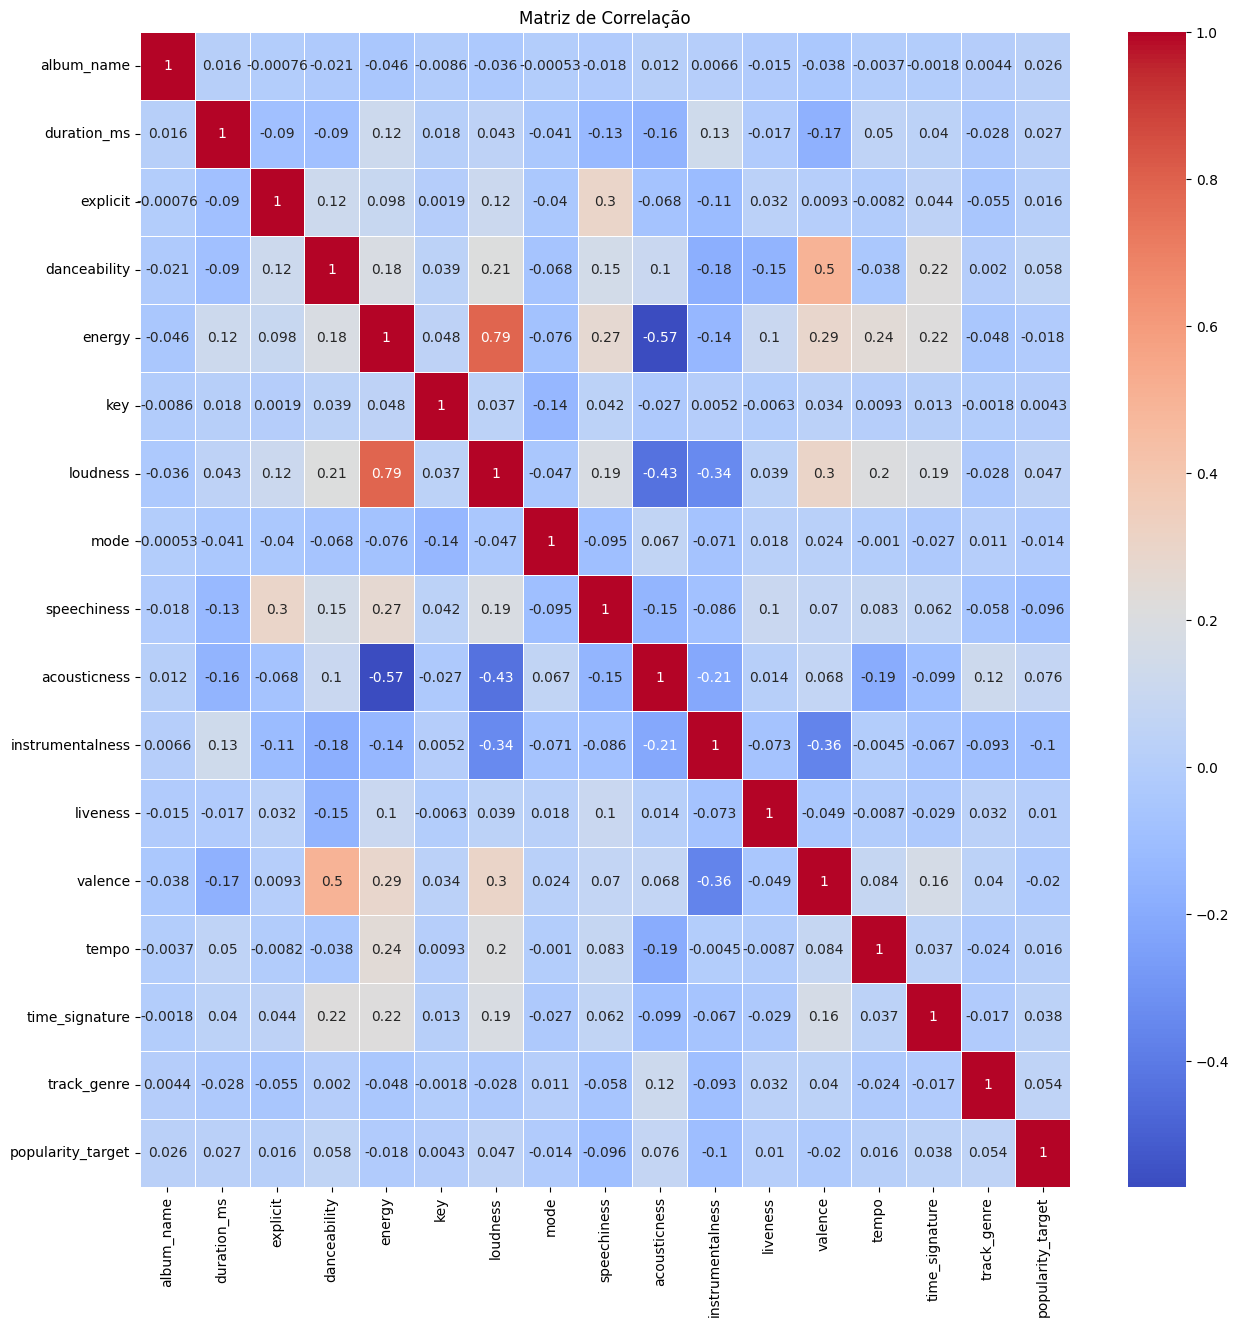

In [489]:
corr_matrix = df.corr()

# Cria o gráfico da matriz de correlação
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Exibe o gráfico
plt.title('Matriz de Correlação')
plt.show()

A partir da matrix de correlação anterior, buscou-se visualizar os pares de atributos com a maior módulo de correlação. Nesse sentido, começamos com o gráfico que relaciona os atributos `loudness` (volume) e `energy` (energia), trazendo uma marcação do nível de popularidade:

Observa-se a relação entre os dados, nos quais músicas com maior volume em decibéis possuem, em geral, maior intensidade e atividade (energia). Entretanto, nota-se também que o nível de popularidade aparenta ter pouca relação direta com esses dois atributos, estando distribuída de maneira uniforme entre os dados.

## Hipóteses

A partir das análises anteriores, formulou-se hipóteses sobre as relações entre diferentes atributos e a popularidade das músicas.

### "Óperas" tem uma taxa de popularidade menor que músicas de anime

Esta hipótese afirma que músicas com canto lírico (óperas), possuem uma taxa de popularidade menor que músicas de anime. Buscando averiguar esta hipótese, construiu-se o seguinte gráfico plotanto a taxa de popularidade desses dois gêneros:

In [490]:
filtered_df = full[full['track_genre'].isin(['opera', 'anime'])]


popularity_by_genre = filtered_df.groupby('track_genre')['popularity_target'].mean().reset_index()

fig = px.bar(popularity_by_genre, x='track_genre', y='popularity_target',
             title='Comparação de popularidade: Ópera e Música de Anime',
             color='track_genre',
             labels={'track_genre': 'Gênero da música', 'popularity_target': 'Média de Popularidade'})
fig.show()

A partir da visualização do gráfico anterior, percebe-se que a hipóteses é verdadeira, com as músicas de anime possuindo uma média de preferência de 87%, enquanto óperas possuem uma média de preferência de 17%.

### Músicas com valores de "acústica" altos são menos populares

Considerando a presença de baixa popularidade de ópera, fez-se a proposição de que músicas com perfil mais acústico (mais especificamente com valor de componente acústico maior que 0,5) são menos populares que aquelas com menos perfil acústico.

Para averiguar essa hipótese, fez-se o seguinte código:

A partir do gráfico acima, percebe-se que músicas acústicas apresentam uma popularidade média maior que aquelas não acústicas (48% contra 28%, respectivamente). Tal medição revela que, apesar da baixa popularidade da ópera, tal fator parece não inffluenciar na música acústica.

### Músicas com maior volume e energia são mais populares

A partir da matrix de correlação anterior, foi possível visualizar os pares de atributos com a maior módulo de correlação. A verificação de alta correlação em músicas com alto volume e energia levou ao levantamento de uma hipótese de que músicas com esses valores mais elevados seriam mais populares.

Buscando tentar averiguar a presença dessa correlação, plotou-se o seginte gráfico:

In [491]:
px.scatter(df, x='loudness', y='energy', color='popularity_target', title='Relação entre volume e energia com o nível de popularidade de uma música', labels={'energy':'Energia', 'loudness':'Volume', 'popularity_target':'Nível de popularidade'})

O gráfico acima evidencia a existência de uma relação entre o volume e a energia de um música, na qual as duas crescem juntas. Apesar disso, uniformidade na distribuião de músicas populares e não populares nos dados acaba por revelar que o fato de uma música ter alta energia e volume não significa que esta é popular.

## Construção do modelo

In [492]:
X = df.drop(columns=['popularity_target'])
y = df['popularity_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

In [ ]:
clf = RandomForestClassifier(max_depth=20, random_state=6, n_estimators=300)
clf.fit(X, y)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
param_dist = {'n_estimators': randint(240,500),
              'max_depth': randint(12,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Melhores hiperparametros:',  rand_search.best_params_)

In [ ]:
def generate_popularity_predictions(trained_model, enc, test_df, original_columns, output_file='popularity_predictions.csv'):
    # Remover colunas irrelevantes no conjunto de teste
    test_df = test_df.drop(columns=['track_id', 'track_name', 'artists'])

    # Aplicar a transformação usando o encoder treinado
    test_df_encoded = pd.DataFrame(enc.fit_transform(test_df), columns=original_columns.drop('popularity_target'))

    test_df_encoded = test_df_encoded.drop(columns=['track_unique_id'])


    # Fazer previsões para o conjunto de teste usando o modelo já treinado
    predictions = trained_model.predict(test_df_encoded)

    # Criar o DataFrame final com as colunas track_unique_id e popularity_target
    test_ids = test_df['track_unique_id']
    output_df = pd.DataFrame({
        'track_unique_id': test_ids,
        'popularity_target': predictions
    })

    # Gerar o arquivo CSV
    output_df.to_csv(output_file, index=False)
    print(f"Arquivo CSV '{output_file}' gerado com sucesso.")

# Exemplo de uso:
# Assumindo que você já tem o modelo treinado (trained_model) e o encoder (enc)
test_df = pd.read_csv('/content/drive/MyDrive/2024/Módulos/Pastas pessoais/2024 - Módulo 3/Semana 9/Ponderada de programação /Data/proximo-hit-spotify/test.csv')

# original_columns deve ser a lista de colunas do DataFrame que foi usado para treinar o encoder
generate_popularity_predictions(clf, enc, test_df, original_columns)

In [ ]:
a = pd.read_csv('/content/popularity_predictions.csv')
pd.DataFrame(a['popularity_target']).value_counts()